In [1]:
from datetime import datetime

from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from_beginning = '1987-01-01'

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.05299230058511295
Avg Annual Return (Ari): 0.0874667604079842
Volatility (Std): 0.25608923989579024
Sharpe Ratio: 0.20692904007476837
Downside Volatility: 0.18380665570924926
Sortino Ratio: 0.2883045795084685
VaR 99: -0.04221301954895011
VaR 99 (Year): -0.4779677337926634
CVaR 99: -0.06390772924618005
CVaR 99 (Year): -0.4779677337926634
Initial Value: 2540.10009765625
Peak Value: 33154.12109375
Final Value: 17008.560546875
Max Drawdown: 0.6518186042408531
Avg Drawdown: 0.25414344209367196
Calmar Ratio: 0.081299153231183
Sterling Ratio: 0.20851335036841556
Monthly Stats: 
           mean        std    median        q1        q3        max        min
Month                                                                         
1      0.108838   7.381218  0.708198 -5.570009  5.691372  13.529388 -14.893693
2      1.563425   6.013340  1.250924 -1.857724  6.485447  11.481628 -11.978626
3     -0.879

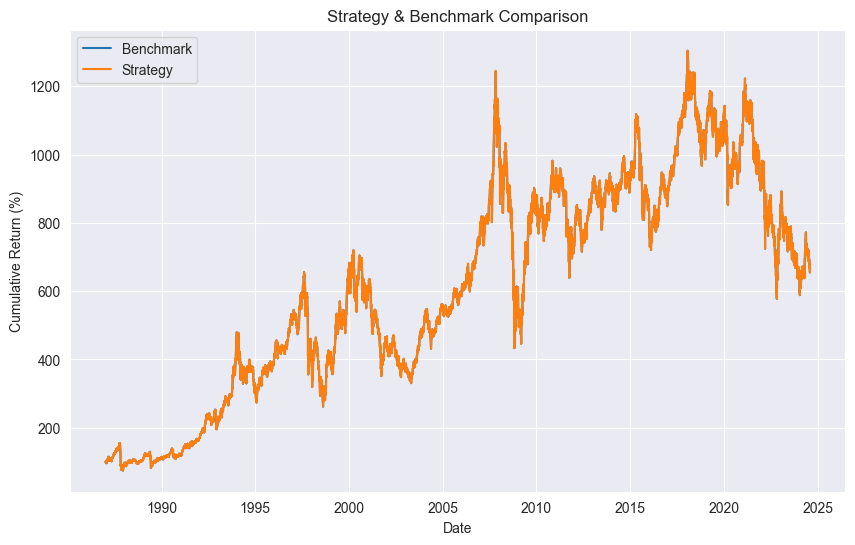

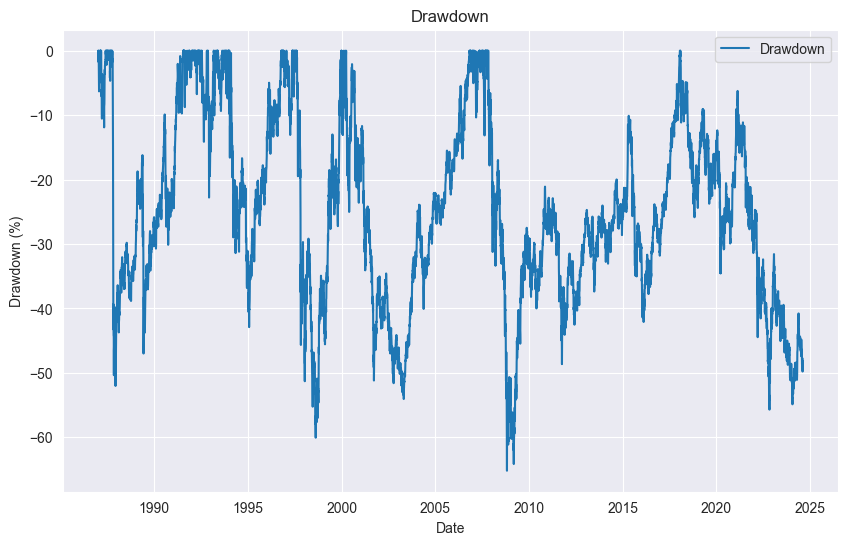

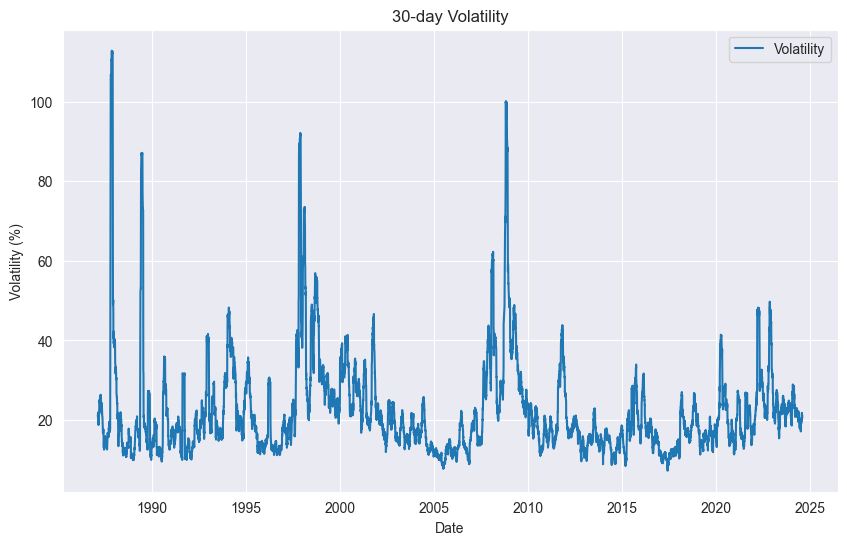

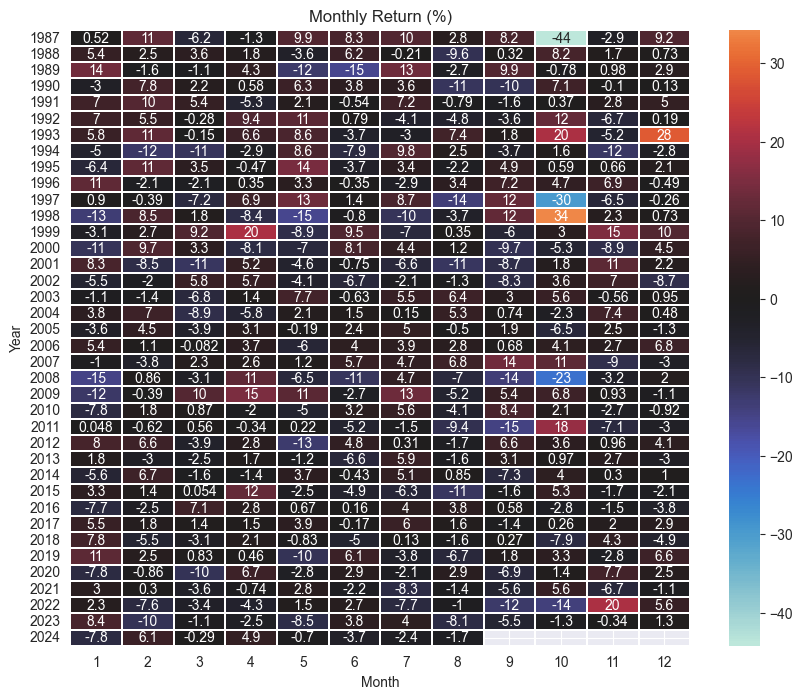

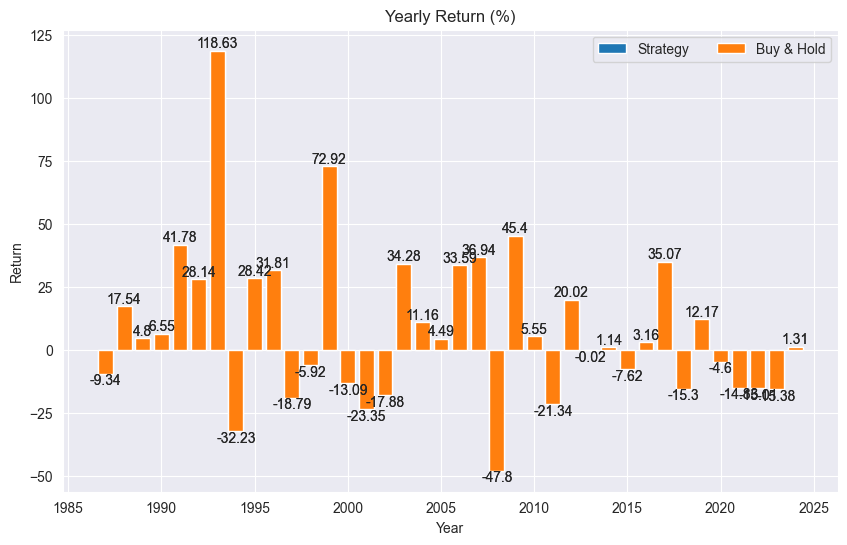

In [3]:
start_date = from_beginning
hsi = yf.download('^HSI', start=start_date)

hsi_df = pd.DataFrame()
hsi_df['Price'] = hsi['Adj Close']
hsi_df['Value'] = hsi['Adj Close']
hsi_df['Return'] = hsi['Adj Close'].pct_change()

test_hsi = Backtest(hsi_df)

In [62]:
hsi_monthly = test_hsi.results['Monthly Return']
# set time here
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
last_30_years = f'{today.year - 29}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, last_30_years, start_date]

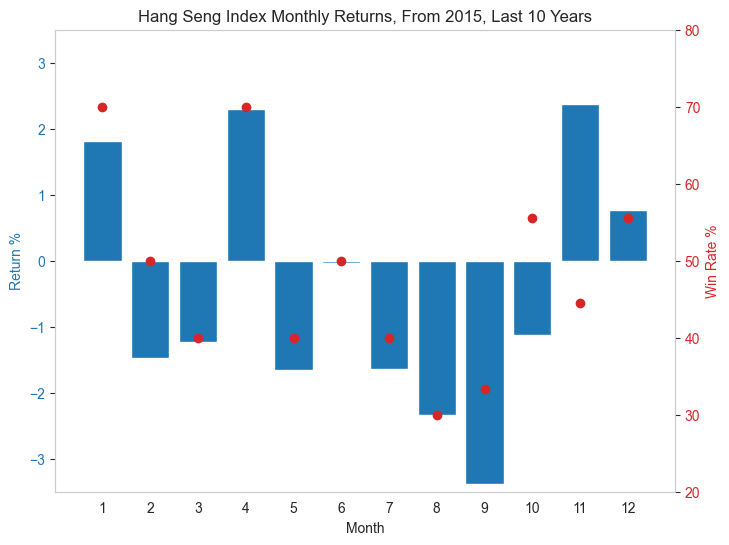

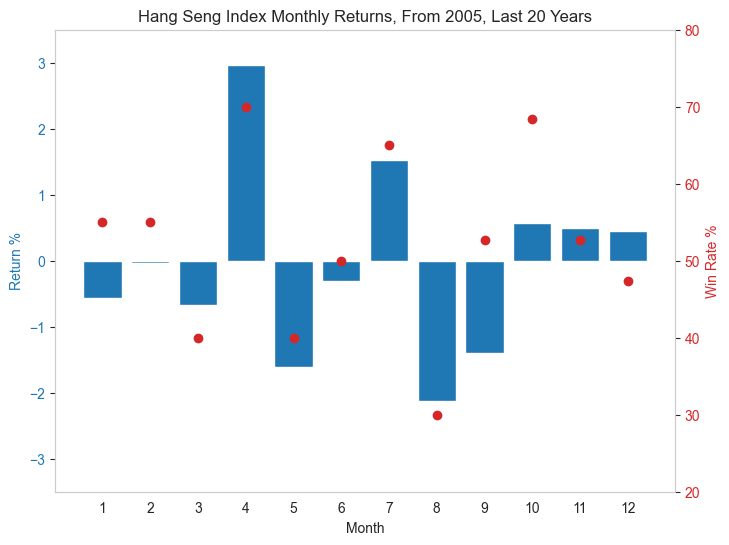

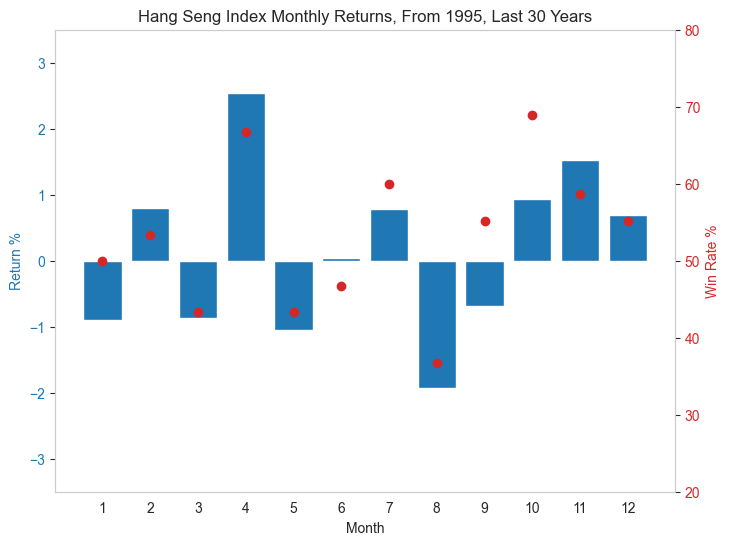

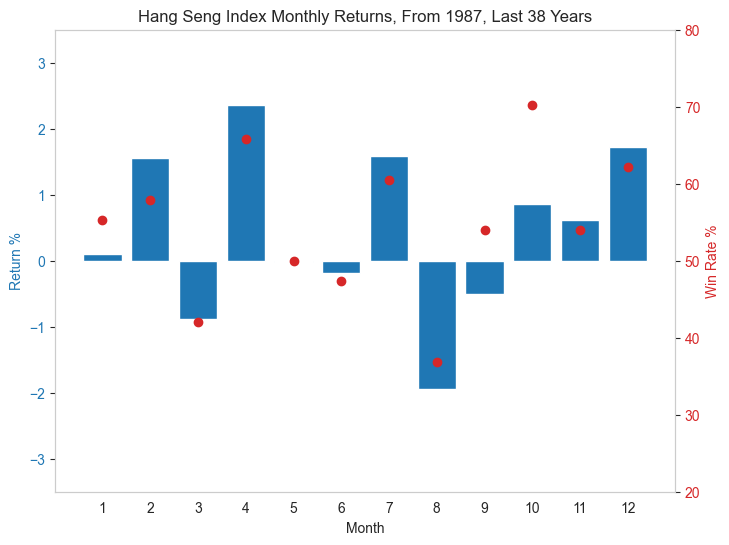

In [69]:
for time in choices:
    _new_df = hsi_monthly[hsi_monthly.index >= time]
    
    avg_returns = _new_df.groupby(_new_df.index.month).mean() * 100
    avg_returns.name = 'Return %'
    avg_returns.index.name = 'Month'
    
    wins = _new_df.groupby(_new_df.index.month).apply(lambda x: (x > 0).sum())
    alls = _new_df.groupby(_new_df.index.month).count()
    win_rates = wins / alls * 100
    win_rates.name = 'Win Rate %'
    win_rates.index.name = 'Month'
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    plt.grid(False)
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Return %', color=color)
    ax1.bar(x=avg_returns.index, height=avg_returns, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-3.5, 3.5)
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    plt.grid(False)
    color = 'tab:red'
    ax2.set_ylabel('Win Rate %', color=color)  # we already handled the x-label with ax1
    ax2.scatter(x=win_rates.index, y=win_rates, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(20, 80)
    
    plt.xticks(range(1, 13))
    years = 1 + _new_df.index.year[-1] - _new_df.index.year[0]
    plt.title(f'Hang Seng Index Monthly Returns, From {_new_df.index[0].year}, Last {years} Years')
    # plt.savefig(f'hsi_monthly_returns_last_{years}_years.png')
    plt.show()